## 1. "경상남도_창원시_공장등록현황_20210831.csv" 파일을 읽어서 아래의 문제를 해결하는 코드를 작성하시오.

In [1]:
import pandas as pd
import numpy as np

import chardet
import pandas as pd
filename = "경상남도_창원시_공장등록현황_20210831.csv"
with open(filename, 'rb') as f:
    result = chardet.detect(f.readline())  # or read() if the file is small.
    print(result['encoding'])

UTF-8-SIG


In [2]:
data = pd.read_csv('경상남도_창원시_공장등록현황_20210831.csv', encoding='UTF-8-SIG')
d = data['공장대표주소'].str.replace(',','')
d[235]

'경상남도 창원시 의창구 1동 1층 340호 (팔용동)'

### (a) 창원시 각 구별로 분포하는 공장의 수를 계산하시오

In [3]:
l = []
for i in range(len(d)):
    x = d[i].split()
    l.append(x[2])
data['구'] = l
gulist = data['구'].value_counts().index
gu_values = data['구'].value_counts()
gu_values
data['구']

0         진해구
1         성산구
2       마산회원구
3       마산회원구
4         성산구
        ...  
4569      성산구
4570    마산합포구
4571      성산구
4572      의창구
4573      성산구
Name: 구, Length: 4574, dtype: object

### (b) 전체 공장수에서 각 구별로 차지하는 비율을 계산하고 이를 시각화하시오.

성산구      1753
의창구      1252
마산회원구     890
마산합포구     395
진해구       284
Name: 구, dtype: int64


([<matplotlib.patches.Wedge at 0x1be709faa00>,
 [Text(0.3944633982228219, 1.0268391439083844, '성산구'),
  Text(-1.091227421573478, -0.13864600393123117, '의창구'),
  Text(0.029461753177139182, -1.0996053860816295, '마산회원구'),
  Text(0.8680301232608856, -0.6756653795420422, '마산합포구'),
  Text(1.0791392750052569, -0.21320981483301582, '진해구')],
 [Text(0.21516185357608464, 0.5600940784954823, '38.3%'),
  Text(-0.5952149572218971, -0.07562509305339882, '27.4%'),
  Text(0.01607004718753046, -0.5997847560445252, '19.5%'),
  Text(0.47347097632411933, -0.36854475247747753, '8.6%'),
  Text(0.58862142273014, -0.11629626263619043, '6.2%')])

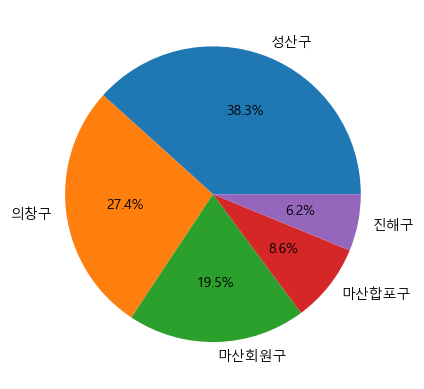

In [4]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
gu_rate = []

for i in range(len(gu_values)):
    x= gu_values[i] / gu_values.sum()
    gu_rate.append(x.round(2))
print(gu_values)

plt.pie(gu_values, labels = gulist, autopct='%1.1f%%')

## 2. "서울일자리센터 인재정보 직종별, 지역별 목록.csv" 파일을 일거서 아래의 문제를 해결하는 코드를 작성하시오.

### (a) 전체 구직자에서 남녀의 수와 비율을 계산하고, 이를 각각 시각화 하시오.

In [5]:
filename = "서울일자리센터 인재정보 직종별, 지역별 목록.csv"
with open(filename, 'rb') as f:
    result = chardet.detect(f.readline())  # or read() if the file is small.
    print(result['encoding'])

EUC-KR


In [6]:
data = pd.read_csv("서울일자리센터 인재정보 직종별, 지역별 목록.csv", encoding='EUC-KR')
data.head()

,구직신청번호,성별,나이,학력공통코드,학력공통코드명,희망근무지역(시도)_1,희망근무지역명(시군구)_1,희망근무지역명(시도)_2,희망근무지역명(시군구)_2,희망직종공통코드,...,희망직종경력년_월수,구직인증상태공통구분,구직인증상태공통구분명,검색키워드1,검색키워드2,검색키워드3,검색키워드4,검색키워드5,등록일시,수정일시
0,H128202107071973,남,74,J00106,고등학교,서울,강북구,서울,NaN,814001,...,6년0월,J03402,승인,NaN,NaN,NaN,NaN,NaN,15:29.0,15:34.0
1,H309202107071965,남,87,J00100,관계없음,서울,강북구,NaN,NaN,561100,...,신입,J03402,승인,NaN,NaN,NaN,NaN,NaN,05:55.0,05:59.0
2,H110202107071953,여,68,J00100,관계없음,서울,서초구,서울,강남구,561101,...,신입,J03402,승인,NaN,NaN,NaN,NaN,NaN,57:27.0,57:30.0
3,H318202107071951,남,30,J00106,고등학교,서울,금천구,NaN,NaN,622301,...,신입,J03402,승인,NaN,NaN,NaN,NaN,NaN,51:30.0,51:33.0
4,H129202107071950,여,66,J00106,고등학교,서울,송파구,서울,NaN,561101,...,3년0월,J03402,승인,NaN,NaN,NaN,NaN,NaN,51:25.0,51:29.0


[0.62, 0.38]


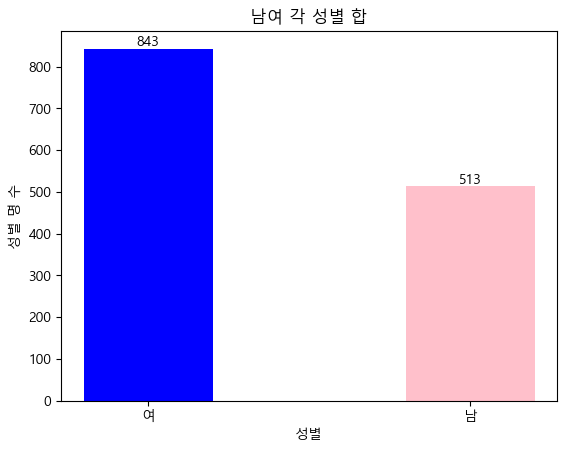

In [7]:
sex_title = data['성별'].value_counts().index
sex_value_sum = data['성별'].value_counts()
sex_rate = []
for i in range(2):
    x = data['성별'].value_counts()[i] / data['성별'].value_counts().sum()
    sex_rate.append(x.round(2))
print(sex_rate)
sex_value_sum.values
bars = plt.bar(sex_title, sex_value_sum, width = 0.4, color=['blue', 'pink'])
plt.xlabel('성별'), plt.ylabel('성별 명 수'), plt.title('남여 각 성별 합')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

### (b) 전체 구직자에서 10대에서 90대까지 연령별 숫자와 비율을 계산하여 시각화 하시오.

In [8]:
age_list = data['나이'].values
age_bin = [10,20,30,40,50,60,70,80,90,100]
age_label = ['10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대']
age_count = pd.cut(age_list,age_bin, labels = age_label).codes

In [9]:
pd.value_counts(age_count)
age_count


array([6, 7, 5, ..., 3, 3, 1], dtype=int8)

In [10]:
age_Series = pd.Series(age_count)
age_Series = age_Series.value_counts()
age_Series = age_Series.rename({ 0 : '10대',
                  1 : '20대',
                  2 : '30대',
                  3 : '40대',
                  4 : '50대',
                  5 : '60대',
                  6 : '70대',
                  7 : '80대',
                  8 : '90대',})
age_Series

60대    571
50대    386
70대    128
40대    123
20대     86
30대     52
10대      6
80대      4
dtype: int64

In [11]:
age_index = age_Series.index

In [12]:
age_Series = age_Series.sort_index()
age_Series.values

array([  6,  86,  52, 123, 386, 571, 128,   4], dtype=int64)

In [13]:
age_rate = []
for i in range(len(age_Series)):
    x = age_Series[i] / age_Series.sum()
    age_rate.append(x.round(3))
print(age_rate)

[0.004, 0.063, 0.038, 0.091, 0.285, 0.421, 0.094, 0.003]


(<BarContainer object of 8 artists>,
 Text(0.5, 0, '연령대'),
 Text(0, 0.5, '연령대별 명 수'),
 Text(0.5, 1.0, '연령대 별 인원 수'))

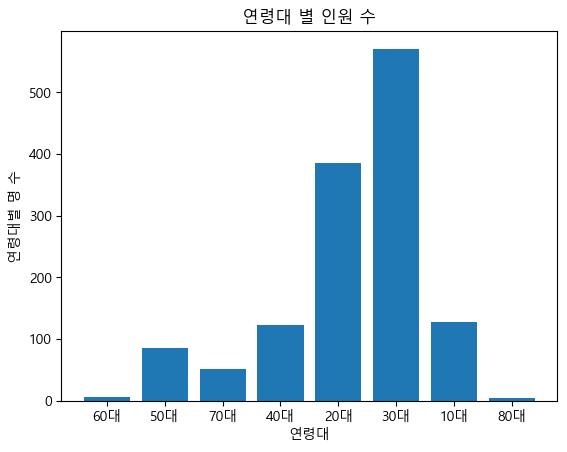

In [14]:
plt.bar(age_index, age_Series.values), plt.xlabel('연령대') , plt.ylabel('연령대별 명 수'), plt.title('연령대 별 인원 수')

In [15]:
data[(data['나이'] <= 20) | (data['나이'] >= 80)]

,구직신청번호,성별,나이,학력공통코드,학력공통코드명,희망근무지역(시도)_1,희망근무지역명(시군구)_1,희망근무지역명(시도)_2,희망근무지역명(시군구)_2,희망직종공통코드,...,희망직종경력년_월수,구직인증상태공통구분,구직인증상태공통구분명,검색키워드1,검색키워드2,검색키워드3,검색키워드4,검색키워드5,등록일시,수정일시
1,H309202107071965,남,87,J00100,관계없음,서울,강북구,NaN,NaN,561100,...,신입,J03402,승인,NaN,NaN,NaN,NaN,NaN,05:55.0,05:59.0
33,H121202107071757,남,80,J00106,고등학교,서울,중랑구,서울,NaN,624102,...,3년0월,J03402,승인,NaN,NaN,NaN,NaN,NaN,41:50.0,41:54.0
311,H307202107070492,여,84,J00102,초등학교,서울,중랑구,서울,NaN,561100,...,신입,J03402,승인,NaN,NaN,NaN,NaN,NaN,44:59.0,45:03.0
379,H001202107062256,남,18,J00106,고등학교,서울,성북구,서울,NaN,26101,...,신입,J03402,승인,NaN,NaN,NaN,NaN,NaN,47:52.0,50:51.0
425,H311202107061880,남,80,J00102,초등학교,서울,노원구,서울,도봉구,561101,...,3년0월,J03402,승인,상계동,NaN,NaN,NaN,NaN,48:17.0,48:20.0
430,H316202107061875,남,18,J00106,고등학교,서울,강서구,서울,NaN,834000,...,신입,J03404,알선,NaN,NaN,NaN,NaN,NaN,43:14.0,43:19.0
434,H316202107061830,남,17,J00106,고등학교,서울,강서구,서울,NaN,834000,...,신입,J03404,알선,NaN,NaN,NaN,NaN,NaN,38:42.0,38:47.0
438,H316202107061826,남,17,J00106,고등학교,서울,강서구,서울,NaN,834000,...,신입,J03404,알선,NaN,NaN,NaN,NaN,NaN,33:23.0,33:28.0
468,H311202107061667,여,83,J00102,초등학교,서울,노원구,서울,NaN,561100,...,신입,J03402,승인,NaN,NaN,NaN,NaN,NaN,57:52.0,57:56.0
550,H316202107061268,남,17,J00106,고등학교,서울,강서구,서울,NaN,834000,...,신입,J03404,알선,NaN,NaN,NaN,NaN,NaN,39:22.0,39:27.0


### (c) "A 전자" 인사과에서는 나이, 지역, 희망 직종 상관없이 학력이 고졸 이상이고, 60개월 이상의 경력직 구직자를 찾는다. 해당 구직자들을 찾아서 화면에 출력하시오.

In [16]:
data

,구직신청번호,성별,나이,학력공통코드,학력공통코드명,희망근무지역(시도)_1,희망근무지역명(시군구)_1,희망근무지역명(시도)_2,희망근무지역명(시군구)_2,희망직종공통코드,...,희망직종경력년_월수,구직인증상태공통구분,구직인증상태공통구분명,검색키워드1,검색키워드2,검색키워드3,검색키워드4,검색키워드5,등록일시,수정일시
0,H128202107071973,남,74,J00106,고등학교,서울,강북구,서울,NaN,814001,...,6년0월,J03402,승인,NaN,NaN,NaN,NaN,NaN,15:29.0,15:34.0
1,H309202107071965,남,87,J00100,관계없음,서울,강북구,NaN,NaN,561100,...,신입,J03402,승인,NaN,NaN,NaN,NaN,NaN,05:55.0,05:59.0
2,H110202107071953,여,68,J00100,관계없음,서울,서초구,서울,강남구,561101,...,신입,J03402,승인,NaN,NaN,NaN,NaN,NaN,57:27.0,57:30.0
3,H318202107071951,남,30,J00106,고등학교,서울,금천구,NaN,NaN,622301,...,신입,J03402,승인,NaN,NaN,NaN,NaN,NaN,51:30.0,51:33.0
4,H129202107071950,여,66,J00106,고등학교,서울,송파구,서울,NaN,561101,...,3년0월,J03402,승인,NaN,NaN,NaN,NaN,NaN,51:25.0,51:29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,H001202104121072,여,54,J00102,초등학교,서울,도봉구,서울,전체,561101,...,신입,J03404,알선,청소,NaN,NaN,NaN,NaN,25:40.0,39:47.0
1352,H310202104090587,여,61,J00104,중학교,서울,도봉구,서울,전체,550104,...,10년0월,J03404,알선,긴시간,NaN,NaN,NaN,NaN,37:31.0,19:48.0
1353,H001202101250403,여,47,J00110,대학_대학교,서울,전체,경기,광명시,27200,...,15년0월,J03404,알선,전산입력,부동산중개,컴퓨터활용,자료편집,고객민원상담,59:11.0,10:01.0
1354,H001202101250036,여,47,J00108,전문대학,서울,노원구,서울,중랑구,231101,...,1년2월,J03402,승인,NaN,NaN,NaN,NaN,NaN,10:47.0,08:06.0


In [17]:
data.columns

Index(['구직신청번호', '성별', '나이', '학력공통코드', '학력공통코드명', '희망근무지역(시도)_1',
       '희망근무지역명(시군구)_1', '희망근무지역명(시도)_2', '희망근무지역명(시군구)_2', '희망직종공통코드',
       '희망직종공통코드명', '희망직종경력년수', '희망직종경력개월수', '희망직종경력년_월수', '구직인증상태공통구분',
       '구직인증상태공통구분명', '검색키워드1', '검색키워드2', '검색키워드3', '검색키워드4', '검색키워드5', '등록일시',
       '수정일시'],
      dtype='object')

In [18]:
data = data[data['학력공통코드'].str[3:] >= '106']

In [19]:
data[data['희망직종경력년수'] >= 5]

,구직신청번호,성별,나이,학력공통코드,학력공통코드명,희망근무지역(시도)_1,희망근무지역명(시군구)_1,희망근무지역명(시도)_2,희망근무지역명(시군구)_2,희망직종공통코드,...,희망직종경력년_월수,구직인증상태공통구분,구직인증상태공통구분명,검색키워드1,검색키워드2,검색키워드3,검색키워드4,검색키워드5,등록일시,수정일시
0,H128202107071973,남,74,J00106,고등학교,서울,강북구,서울,NaN,814001,...,6년0월,J03402,승인,NaN,NaN,NaN,NaN,NaN,15:29.0,15:34.0
9,H129202107071899,남,63,J00106,고등학교,서울,송파구,서울,강동구,561101,...,10년0월,J03402,승인,NaN,NaN,NaN,NaN,NaN,33:48.0,33:52.0
15,H311202107071854,남,54,J00106,고등학교,서울,노원구,서울,NaN,562300,...,10년0월,J03404,알선,NaN,NaN,NaN,NaN,NaN,15:31.0,15:36.0
21,H307202107071829,여,55,J00106,고등학교,서울,중랑구,서울,NaN,615100,...,30년0월,J03404,알선,NaN,NaN,NaN,NaN,NaN,01:15.0,01:20.0
28,H001202107071787,남,46,J00110,대학_대학교,서울,NaN,대전,NaN,15100,...,15년0월,J03402,승인,영화관,극장,매장운영,NaN,NaN,51:03.0,03:49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342,H001202104280192,남,56,J00108,전문대학,서울,중구,서울,전체,151109,...,15년0월,J03402,승인,NaN,NaN,NaN,NaN,NaN,07:13.0,39:44.0
1345,H001202104231487,남,50,J00106,고등학교,서울,전체,경기,전체,622901,...,5년0월,J03404,알선,태국어통역,자가용운전기사,태국어번역,태국직원,NaN,53:01.0,10:28.0
1349,H306202104131663,여,66,J00106,고등학교,서울,동대문구,서울,전체,616101,...,10년0월,J03402,승인,NaN,NaN,NaN,NaN,NaN,48:36.0,10:21.0
1350,H324202104121333,남,60,J00108,전문대학,서울,송파구,서울,NaN,561102,...,10년0월,J03404,알선,NaN,NaN,NaN,NaN,NaN,43:43.0,50:44.0


# 문제 2.
### 아래의 코드를 참고하여 답하시오.

In [20]:
import pandas as pd
ndf1 = pd.read_excel("D00EXAMPLE.xlsx", sheet_name=0)
ndf2 = pd.read_excel("D00EXAMPLE.xlsx", sheet_name=1)
ndf3 = pd.read_excel("D00EXAMPLE.xlsx", sheet_name=2)
ndf4 = pd.read_excel("D00EXAMPLE.xlsx", sheet_name=3)

In [21]:
ndf1 = ndf1.set_index('노래')

ndf1 = ndf1.stack().reset_index()
ndf1.columns=["심사자", "참가자", "노래점수"]
ndf1

,심사자,참가자,노래점수
0,이효리,A,6
1,이효리,B,9
2,이효리,C,7
3,이효리,D,6
4,이효리,E,6
5,양현석,A,8
6,양현석,B,9
7,양현석,C,7
8,양현석,D,10
9,양현석,E,9


In [22]:
ndf2 = ndf2.set_index('댄스')
ndf2 = ndf2.stack().reset_index()
ndf2.columns=["심사자", "참가자", "댄스점수"]
ndf2

,심사자,참가자,댄스점수
0,이효리,A,7
1,이효리,B,8
2,이효리,C,6
3,이효리,D,8
4,이효리,E,9
5,양현석,A,7
6,양현석,B,8
7,양현석,C,9
8,양현석,D,9
9,양현석,E,8


In [23]:
ndf3 = ndf3.set_index('스타성')
ndf3 = ndf3.stack().reset_index()
ndf3.columns=["심사자", "참가자", "스타성점수"]
ndf3

,심사자,참가자,스타성점수
0,이효리,A,9
1,이효리,B,9
2,이효리,C,6
3,이효리,D,10
4,이효리,E,8
5,양현석,A,8
6,양현석,B,7
7,양현석,C,6
8,양현석,D,10
9,양현석,E,9


# (a) merge 함수를 사용하여 아래의 테이블 모양으로 출력하는 코드를 작성하시오.
<img src="2번_1.jpg" align="left" width="300"/>

In [24]:
new_data = pd.merge(ndf1, ndf2, on = ['심사자','참가자'])
new_data = pd.merge(new_data, ndf3, on = ['심사자','참가자'])

In [25]:
sex = {'이효리' : '여' , '양현석' : '남', '이승철' : '남', '서인영' : '여', '김범수' : '남'}

In [26]:
new_data['성별'] = new_data['심사자'].map(sex)
new_data

,심사자,참가자,노래점수,댄스점수,스타성점수,성별
0,이효리,A,6,7,9,여
1,이효리,B,9,8,9,여
2,이효리,C,7,6,6,여
3,이효리,D,6,8,10,여
4,이효리,E,6,9,8,여
5,양현석,A,8,7,8,남
6,양현석,B,9,8,7,남
7,양현석,C,7,9,6,남
8,양현석,D,10,9,10,남
9,양현석,E,9,8,9,남


# (b) 아래의 테이블은 각 심사자 남여 구분에 따른 참가자들의 해당항목 점수 평균값을 나타낸것이다. 출력하는 코드를 작성하시오.
<img src="2번_2.jpg" align="left" width="300"/>

In [27]:
new_data

,심사자,참가자,노래점수,댄스점수,스타성점수,성별
0,이효리,A,6,7,9,여
1,이효리,B,9,8,9,여
2,이효리,C,7,6,6,여
3,이효리,D,6,8,10,여
4,이효리,E,6,9,8,여
5,양현석,A,8,7,8,남
6,양현석,B,9,8,7,남
7,양현석,C,7,9,6,남
8,양현석,D,10,9,10,남
9,양현석,E,9,8,9,남


In [28]:
new_data = new_data.set_index('참가자')
new_data

,심사자,노래점수,댄스점수,스타성점수,성별
참가자,,,,,
A,이효리,6,7,9,여
B,이효리,9,8,9,여
C,이효리,7,6,6,여
D,이효리,6,8,10,여
E,이효리,6,9,8,여
A,양현석,8,7,8,남
B,양현석,9,8,7,남
C,양현석,7,9,6,남
D,양현석,10,9,10,남


In [29]:
new_data = new_data.drop(columns = '심사자')

In [30]:
new_data

,노래점수,댄스점수,스타성점수,성별
참가자,,,,
A,6,7,9,여
B,9,8,9,여
C,7,6,6,여
D,6,8,10,여
E,6,9,8,여
A,8,7,8,남
B,9,8,7,남
C,7,9,6,남
D,10,9,10,남


In [31]:
new_data1 = new_data.groupby(['참가자', '성별'])[['노래점수', '댄스점수', '스타성점수']].mean()

In [32]:
new_data1.unstack()

노래점수           댄스점수          스타성점수     
성별          남    여         남    여         남    여
참가자                                             
A    8.666667  8.0  8.333333  8.5  8.000000  9.5
B    9.333333  8.0  7.333333  7.0  8.333333  9.5
C    8.000000  7.0  8.666667  6.0  8.666667  6.5
D    8.666667  7.5  8.000000  7.5  8.333333  9.0
E    8.666667  6.5  8.666667  8.5  9.000000  8.0

In [33]:
new_data.pivot_table(index = '참가자',columns = '성별')

노래점수           댄스점수          스타성점수     
성별          남    여         남    여         남    여
참가자                                             
A    8.666667  8.0  8.333333  8.5  8.000000  9.5
B    9.333333  8.0  7.333333  7.0  8.333333  9.5
C    8.000000  7.0  8.666667  6.0  8.666667  6.5
D    8.666667  7.5  8.000000  7.5  8.333333  9.0
E    8.666667  6.5  8.666667  8.5  9.000000  8.0

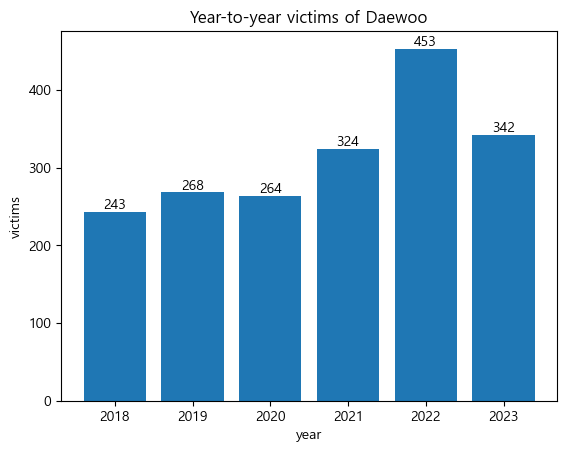

In [34]:
x = [243,268,264,324,453,342]
y = [2018,2019,2020,2021,2022,2023]

plt.bar(y,x)

for i in range(len(x)):
    plt.text(y[i], x[i], str(x[i]), ha='center', va='bottom')
plt.xlabel('year'),plt.ylabel('victims'),plt.title('Year-to-year victims of Daewoo')
plt.show()

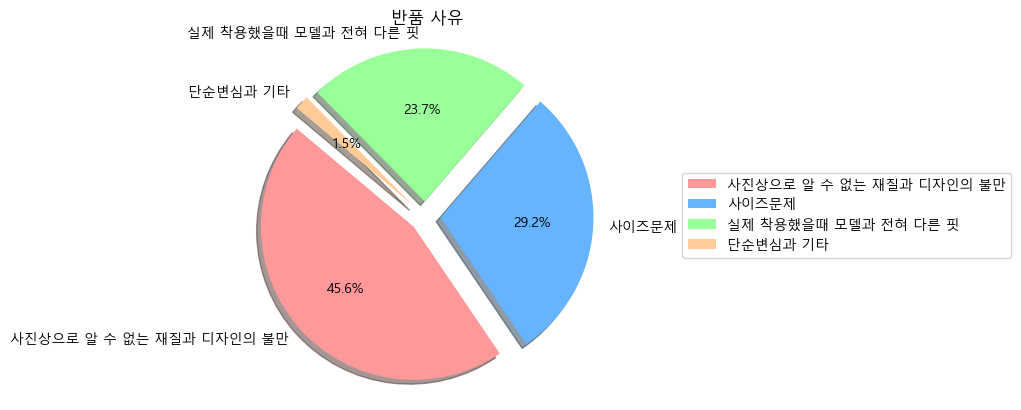

In [36]:
import matplotlib.pyplot as plt



# 데이터
labels = ['사진상으로 알 수 없는 재질과 디자인의 불만', '사이즈문제', '실제 착용했을때 모델과 전혀 다른 핏', '단순변심과 기타']
sizes = [45.6, 29.2, 23.7, 100 - (45.6 + 29.2 + 23.7)]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = (0.1, 0.1, 0.1, 0.1)  # 강조할 부분

# 원형 그래프 그리기
fig1, ax1 = plt.subplots()
wedges, texts, autotexts = ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
                                   shadow=True, startangle=140)

# 그래프의 비율을 맞추기 위해서 aspect ratio를 equal로 설정
ax1.axis('equal')

# 범례 추가
ax1.legend(wedges, labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# 제목 추가
plt.title('반품 사유')
plt.show()
